In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.decomposition import PCA

In [2]:
# Data Loading
photos_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/photos.csv', sep=',', encoding='latin-1',low_memory=False)
ratings_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/ratings.csv', sep=',', encoding='latin-1',low_memory=False)
surveys_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/surveys.csv', sep=',', encoding='latin-1',low_memory=False)
annotations_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/annotations.csv', sep=',', encoding='latin-1',low_memory=False)

In [3]:
#Go fetch the train and test
testset = pd.read_csv('testset.csv')
trainset = pd.read_csv('trainset.csv')

# Converter de volta para lista de tuplas
testset = [tuple(row) for row in testset.to_numpy()]
trainset = [tuple(row) for row in trainset.to_numpy()]

# Exibir os dados carregados
print(testset)
print(trainset)

[(1, 1738, 1), (1, 318, 0), (1, 1055, 1), (2, 40, 1), (2, 1898, 0), (2, 544, 1), (3, 675, 1), (3, 235, 0), (3, 1295, 1), (4, 2901, 1), (4, 1250, 0), (4, 1082, 1), (5, 1717, 1), (5, 2717, 1), (5, 2897, 1), (6, 1251, 1), (6, 2143, 1), (6, 546, 1), (7, 429, 1), (7, 2877, 0), (7, 2195, 1), (8, 38, 1), (8, 2516, 0), (8, 1925, 0), (9, 1839, 1), (9, 2677, 0), (9, 1543, 1), (10, 2738, 1), (10, 3059, 0), (10, 2892, 1), (11, 1255, 1), (11, 2002, 0), (11, 1612, 0), (12, 1235, 1), (12, 2876, 0), (12, 2099, 1), (13, 2474, 1), (13, 2684, 0), (13, 155, 0), (14, 2533, 1), (14, 857, 0), (14, 2736, 0), (15, 1312, 1), (15, 2390, 0), (15, 407, 1), (16, 215, 1), (16, 1335, 0), (16, 205, 1), (17, 530, 1), (17, 3057, 0), (17, 791, 1), (18, 1737, 1), (18, 954, 0), (18, 1156, 1), (19, 980, 1), (19, 98, 1), (19, 3004, 1), (20, 1429, 1), (20, 1861, 0), (20, 567, 1), (21, 584, 1), (21, 853, 0), (21, 2792, 1), (22, 1428, 1), (22, 365, 0), (22, 724, 1), (23, 634, 1), (23, 534, 0), (23, 1315, 1), (24, 1683, 1), (24,

In [4]:
import pandas as pd

df_embeddings_vgg16 = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/embeddings_vgg16.csv')
df_embeddings_vgg19 = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/embeddings_vgg19.csv')

In [5]:
df_embeddings_resnet50 = pd.read_json('df_embeddings_resnet152.json', orient='records', lines=True)
df_embeddings_resnet50v2 = pd.read_json('df_embeddings_resnet152.json', orient='records', lines=True)
df_embeddings_resnet101 = pd.read_json('df_embeddings_resnet152.json', orient='records', lines=True)
df_embeddings_resnet101v2 = pd.read_json('df_embeddings_resnet152.json', orient='records', lines=True)
df_embeddings_resnet152 = pd.read_json('df_embeddings_resnet152.json', orient='records', lines=True)
df_embeddings_resnet152v2 = pd.read_json('df_embeddings_resnet152.json', orient='records', lines=True)
df_embeddings_inceptionv3 = pd.read_json('df_embeddings_resnet152.json', orient='records', lines=True)
df_embeddings_xception = pd.read_json('df_embeddings_resnet152.json', orient='records', lines=True)

In [6]:
df_embeddings_resnet152 = pd.read_json('df_embeddings_resnet152.json', orient='records', lines=True)

df_embeddings_resnet152

,embedding,id
0,"[[1.1370655298, 0.0, 3.5498535633, 1.936263799...",492
1,"[[1.7643741369, 2.2429094315, 0.8603625298, 2....",496
2,"[[8.951385498, 9.810792923, 2.2054009438, 3.36...",1
3,"[[2.6090278625, 11.295633316, 7.1894006729, 25...",2
4,"[[0.0, 16.1811351776, 0.0, 13.9914884567, 5.58...",3
...,...,...
2880,"[[2.5227589607, 0.5457572937, 1.452921629, 21....",751
2881,"[[0.0, 7.9499158859, 2.0273284912, 11.88034152...",1070
2882,"[[2.08923769, 2.1007084846, 0.7134401798000001...",2877
2883,"[[1.301582098, 4.6526865959, 0.0, 25.383850097...",2878


In [7]:
embeddings_list_restnet50 = df_embeddings_resnet50['embedding'].tolist()
embeddings_list_restnet50v2 = df_embeddings_resnet50v2['embedding'].tolist()
embeddings_list_restnet101 = df_embeddings_resnet101['embedding'].tolist()
embeddings_list_restnet101v2 = df_embeddings_resnet101v2['embedding'].tolist()
embeddings_list_restnet152 = df_embeddings_resnet152['embedding'].tolist()
embeddings_list_restnet152v2 = df_embeddings_resnet152v2['embedding'].tolist()
embeddings_list_inceptionv3 = df_embeddings_inceptionv3['embedding'].tolist()
embeddings_list_xception = df_embeddings_xception['embedding'].tolist()

# Crie um DataFrame onde cada vetor de embedding é uma lista em uma única coluna
df_embeddings_resnet50_1 = pd.DataFrame({'embedding': embeddings_list_restnet50})
df_embeddings_resnet50v2_1 = pd.DataFrame({'embedding': embeddings_list_restnet50v2})
df_embeddings_resnet101_1 = pd.DataFrame({'embedding': embeddings_list_restnet101})
df_embeddings_resnet101v2_1 = pd.DataFrame({'embedding': embeddings_list_restnet101v2})
df_embeddings_resnet152_1 = pd.DataFrame({'embedding': embeddings_list_restnet152})
df_embeddings_resnet152v2_1 = pd.DataFrame({'embedding': embeddings_list_restnet152v2})
df_embeddings_inceptionv3_1 = pd.DataFrame({'embedding': embeddings_list_inceptionv3})
df_embeddings_xception_1 = pd.DataFrame({'embedding': embeddings_list_xception})

df_embeddings_resnet50_1['id'] = df_embeddings_resnet50['id'].values
df_embeddings_resnet50v2_1['id'] = df_embeddings_resnet50v2['id'].values
df_embeddings_resnet101_1['id'] = df_embeddings_resnet101['id'].values
df_embeddings_resnet101v2_1['id'] = df_embeddings_resnet101v2['id'].values
df_embeddings_resnet152_1['id'] = df_embeddings_resnet152['id'].values
df_embeddings_resnet152v2_1['id'] = df_embeddings_resnet152v2['id'].values
df_embeddings_inceptionv3_1['id'] = df_embeddings_inceptionv3['id'].values
df_embeddings_xception_1['id'] = df_embeddings_xception['id'].values

# Verifique o resultado
print(df_embeddings_resnet50_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet50_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet50v2_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet50v2_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet101_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet101_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet101v2_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet101v2_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet152_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet152_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet152v2_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet152v2_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_inceptionv3_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_inceptionv3_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_xception_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_xception_1.head())  # Mostra as primeiras linhas do DataFrame

type(df_embeddings_resnet50_1['embedding'][0])
type(df_embeddings_resnet50v2_1['embedding'][0])
type(df_embeddings_resnet101_1['embedding'][0])
type(df_embeddings_resnet101v2_1['embedding'][0])
type(df_embeddings_resnet152_1['embedding'][0])
type(df_embeddings_resnet152v2_1['embedding'][0])
type(df_embeddings_inceptionv3_1['embedding'][0])
type(df_embeddings_xception_1['embedding'][0])


(2885, 2)
                                           embedding   id
0  [[1.1370655298, 0.0, 3.5498535633, 1.936263799...  492
1  [[1.7643741369, 2.2429094315, 0.8603625298, 2....  496
2  [[8.951385498, 9.810792923, 2.2054009438, 3.36...    1
3  [[2.6090278625, 11.295633316, 7.1894006729, 25...    2
4  [[0.0, 16.1811351776, 0.0, 13.9914884567, 5.58...    3
(2885, 2)
                                           embedding   id
0  [[1.1370655298, 0.0, 3.5498535633, 1.936263799...  492
1  [[1.7643741369, 2.2429094315, 0.8603625298, 2....  496
2  [[8.951385498, 9.810792923, 2.2054009438, 3.36...    1
3  [[2.6090278625, 11.295633316, 7.1894006729, 25...    2
4  [[0.0, 16.1811351776, 0.0, 13.9914884567, 5.58...    3
(2885, 2)
                                           embedding   id
0  [[1.1370655298, 0.0, 3.5498535633, 1.936263799...  492
1  [[1.7643741369, 2.2429094315, 0.8603625298, 2....  496
2  [[8.951385498, 9.810792923, 2.2054009438, 3.36...    1
3  [[2.6090278625, 11.295633316, 7.1894006

list

In [8]:
def convert_to_numpy_array(input_str):
    input_str_cleaned = input_str.strip('[]')
    input_list = [list(map(float, sublist.split())) for sublist in input_str_cleaned.split('],[')]
    return np.array(input_list)

df_embeddings_vgg16['embedding'] = df_embeddings_vgg16['embedding'].apply(convert_to_numpy_array)
df_embeddings_vgg19['embedding'] = df_embeddings_vgg19['embedding'].apply(convert_to_numpy_array)

df_embeddings_vgg16

,embedding,id
0,"[[0.0, 25.1039314, 34.5760384, 0.0, 13.1063433...",492
1,"[[0.0, 14.761104, 2.9091244, 8.950207, 29.5257...",496
2,"[[82.287178, 26.5189075, 89.4835129, 11.791474...",1
3,"[[25.3831501, 0.0, 87.222023, 0.0, 28.6426258,...",2
4,"[[0.359096527, 14.3963013, 78.7917786, 4.52763...",3
...,...,...
2880,"[[105.828186, 0.0, 0.0, 0.0, 20.551533, 83.391...",751
2881,"[[145.572113, 0.0, 0.0, 0.0, 0.0, 21.031517, 3...",1070
2882,"[[51.1543999, 94.6103439, 77.2410889, 110.5913...",2877
2883,"[[33.5848999, 76.9306488, 31.350935, 22.185155...",2878


In [9]:
len(df_embeddings_vgg16['embedding'][0][0])

512

In [10]:
embedding_matrix_vgg16 = np.vstack(df_embeddings_vgg16['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_vgg16

array([[ 0.        , 25.1039314 , 34.5760384 , ...,  3.59151506,
         8.98261547, 14.2023478 ],
       [ 0.        , 14.761104  ,  2.9091244 , ...,  2.2438133 ,
        18.997791  ,  0.        ],
       [82.287178  , 26.5189075 , 89.4835129 , ..., 28.0004044 ,
        37.711483  , 33.6548805 ],
       ...,
       [51.1543999 , 94.6103439 , 77.2410889 , ..., 13.0951099 ,
        22.2879791 , 36.8871346 ],
       [33.5848999 , 76.9306488 , 31.350935  , ..., 24.4272232 ,
        24.5896015 , 25.6951828 ],
       [25.995039  ,  0.        , 36.0063629 , ..., 55.1245384 ,
         4.94234943, 50.0449066 ]])

In [11]:
def evaluate_metrics(recommendations, testset, ks):
    """
    Calculates precision, recall, and F1-score for different values of k, based on the recommendations and the test set.

    Args:
        recommendations (dict): A dictionary where keys are user IDs and values are lists of recommended item IDs.
        testset (Dataset): The test dataset containing user-item interactions with ratings.
        ks (list): A list of integer values for k, representing the number of top recommendations to evaluate.

    Returns:
        tuple: Three dictionaries (precisions, recalls, f1_scores) where each key is a value of k and the values are dictionaries mapping user IDs to their respective precision, recall, and F1-score for that k.
    """

    relevant_items_dict = {}
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])
    for user in test_df['uid'].unique():
        user_test_df = test_df[test_df['uid'] == user]
        relevant_items = set(user_test_df[user_test_df['rating'] > 0]['iid'])
        relevant_items_dict[user] = relevant_items

    precisions = {k: {} for k in ks}
    recalls = {k: {} for k in ks}
    f1_scores = {k: {} for k in ks}

    for user, relevant_items in relevant_items_dict.items():
        relevant_set = set(relevant_items)
        # print('relevant_set')
        # print(relevant_set)
        for k in ks:
            top_k_recommendations = set(recommendations[user][:k])
            relevant_and_recommended = top_k_recommendations & relevant_set #Interseption between the recommended and relevant
            # print('relevant_and_recommended')
            # print(relevant_and_recommended)
            rel_rec = len(relevant_and_recommended)
            precision = rel_rec / k if k > 0 else 0.0
            recall = rel_rec / len(relevant_set) if relevant_set else 0.0
            f1score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

            precisions[k][user] = precision
            recalls[k][user] = recall
            f1_scores[k][user] = f1score

    return precisions, recalls, f1_scores

def evaluate_metrics_avg(precisions, recalls, f1scores):
    """Calculates the average precision, recall, an f1-score for different values of k,
    based on the precision, recall, and f1-score metrics calculated for each user

    Args:
        precisions (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their precision score
        recalls (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their recall score
        f1scores (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their f1-score score

    Returns:
        tuple: containing three dicts:
        
        -avg_precisions: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average precision scores
        -avg_recalls: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average recall scores
        -avg_f1-scores: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average f1-scores
    """

    avg_precisions = {k: round(sum(precisions[k].values()) / len(precisions[k]), 4) for k in precisions}
    avg_recalls = {k: round(sum(recalls[k].values()) / len(recalls[k]), 4) for k in recalls}
    avg_f1scores = {k: round(sum(f1scores[k].values()) / len(f1scores[k]), 4) for k in f1scores}

    # print(avg_precisions)
    return avg_precisions, avg_recalls, avg_f1scores

In [12]:
def compute_cosine_similarity_matrix_by_user(df_embeddings):
    """Computes a cosine similarity matrix for user embeddings

    Args:
        df_embeddings (pd.DataFrame): DataFrame containing embeddings and associated IDs for each user. Ut has an 'embedding' column with list or array-like vectors
        and an 'id' column with unique identifiers for each embedding.

    Returns:
        similarity_df: DataFrame representing the cosine similarity matrix between all user embeddings.Rows and columns are labeled by user 'id' values from the input DataFrame.
    """

    pixels_vec = np.array(df_embeddings['embedding'].tolist())

    # print(pixels_vec.shape)
    pixels_vec = np.squeeze(pixels_vec)
    # print(pixels_vec.shape)
    similarity_matrix = cosine_similarity(pixels_vec)
    # print(pixels_vec)

    similarity_df = pd.DataFrame(similarity_matrix, index=df_embeddings['id'], columns=df_embeddings['id'])

    if similarity_df.columns.is_unique == False:
        print('PROBLEM COLUMNS')

    if similarity_df.index.is_unique == False:
        print('PROBLEM INDEXS')

    assert similarity_df.columns.is_unique, f"Duplicated columns in similarity_df: {similarity_df.columns[similarity_df.columns.duplicated()]}"
    assert similarity_df.index.is_unique, f"Duplicated indices in similarity_df: {similarity_df.index[similarity_df.index.duplicated()]}"

        
    return similarity_df

In [13]:
a = compute_cosine_similarity_matrix_by_user(df_embeddings_vgg16)

In [14]:
a

id,492,496,1,2,3,4,5,6,7,8,...,1151,711,2897,2360,1939,751,1070,2877,2878,1341
id,,,,,,,,,,,,,,,,,,,,,
492,1.000000,0.498013,0.406862,0.363559,0.303057,0.376467,0.347564,0.388864,0.408412,0.340896,...,0.287133,0.433998,0.351992,0.601505,0.430989,0.389244,0.313273,0.451081,0.385523,0.301909
496,0.498013,1.000000,0.461658,0.433447,0.364637,0.466885,0.352258,0.420930,0.437025,0.371510,...,0.306143,0.372052,0.455501,0.577973,0.469621,0.375678,0.305222,0.414945,0.362685,0.398179
1,0.406862,0.461658,1.000000,0.659486,0.478819,0.694218,0.645584,0.658460,0.639628,0.625527,...,0.327062,0.489071,0.537124,0.398283,0.359304,0.519709,0.401024,0.607757,0.559786,0.530586
2,0.363559,0.433447,0.659486,1.000000,0.458441,0.596733,0.481069,0.687373,0.494706,0.507457,...,0.317918,0.469082,0.400114,0.392817,0.309522,0.533766,0.371043,0.548044,0.532736,0.510222
3,0.303057,0.364637,0.478819,0.458441,1.000000,0.520333,0.518052,0.443778,0.447199,0.642474,...,0.279968,0.389502,0.336761,0.341152,0.278480,0.474771,0.270858,0.569903,0.512263,0.406996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.389244,0.375678,0.519709,0.533766,0.474771,0.590336,0.461800,0.533300,0.476024,0.510365,...,0.443426,0.592250,0.455510,0.406804,0.347592,1.000000,0.376117,0.552138,0.622689,0.571749
1070,0.313273,0.305222,0.401024,0.371043,0.270858,0.340936,0.325509,0.377636,0.391565,0.297300,...,0.213091,0.352893,0.315315,0.322936,0.241444,0.376117,1.000000,0.366807,0.319491,0.280266
2877,0.451081,0.414945,0.607757,0.548044,0.569903,0.635907,0.524107,0.522312,0.620628,0.634761,...,0.383665,0.472849,0.500283,0.437783,0.340053,0.552138,0.366807,1.000000,0.682532,0.536052


In [15]:
b = compute_cosine_similarity_matrix_by_user(df_embeddings_resnet152_1)

In [16]:
b

id,492,496,1,2,3,4,5,6,7,8,...,1151,711,2897,2360,1939,751,1070,2877,2878,1341
id,,,,,,,,,,,,,,,,,,,,,
492,1.000000,0.547544,0.460252,0.396837,0.325380,0.402289,0.413747,0.478666,0.417276,0.380609,...,0.439166,0.527665,0.438392,0.539589,0.529114,0.431582,0.471366,0.442704,0.423023,0.380282
496,0.547544,1.000000,0.426286,0.408614,0.346220,0.436873,0.379421,0.379216,0.362677,0.381618,...,0.475179,0.435879,0.419232,0.579864,0.508813,0.398057,0.360971,0.413149,0.367121,0.417772
1,0.460252,0.426286,1.000000,0.665604,0.519450,0.675833,0.626839,0.591806,0.645631,0.602943,...,0.445728,0.490310,0.553791,0.420740,0.472936,0.555874,0.477408,0.584300,0.554074,0.504405
2,0.396837,0.408614,0.665604,1.000000,0.538281,0.632996,0.558523,0.610591,0.579958,0.545395,...,0.411501,0.477413,0.462928,0.396001,0.415479,0.553449,0.430925,0.538413,0.556757,0.509550
3,0.325380,0.346220,0.519450,0.538281,1.000000,0.567810,0.560415,0.456227,0.483141,0.638719,...,0.366177,0.401401,0.379619,0.359180,0.376603,0.506112,0.424535,0.547942,0.499827,0.425350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.431582,0.398057,0.555874,0.553449,0.506112,0.551704,0.579006,0.485976,0.539822,0.614365,...,0.532459,0.622431,0.527543,0.423660,0.493932,1.000000,0.444688,0.574274,0.598730,0.580338
1070,0.471366,0.360971,0.477408,0.430925,0.424535,0.468608,0.471347,0.523812,0.515096,0.430651,...,0.413368,0.445906,0.408917,0.402755,0.406001,0.444688,1.000000,0.461886,0.426216,0.426900
2877,0.442704,0.413149,0.584300,0.538413,0.547942,0.610845,0.510615,0.526351,0.565867,0.597163,...,0.519880,0.524708,0.516728,0.499569,0.492379,0.574274,0.461886,1.000000,0.700501,0.516841


In [17]:
def similar_items(item_to_recommend, user_profile_items, similarity_matrix_df, n=5):
    train_items_scores = similarity_matrix_df.loc[item_to_recommend, similarity_matrix_df.columns.isin(user_profile_items)]

    tuples_ids_score = list(zip(train_items_scores.index, train_items_scores.values))
    tuples_ids_score.sort(key=lambda x: x[1], reverse=True)
    item_ids = [item for item, _ in tuples_ids_score]
    # return item_ids[:n]
    return tuples_ids_score[:n] ,item_ids[:n]

In [18]:
def compute_cosine_similarity_matrix_by_user(df_embeddings):
    """Computes a cosine similarity matrix for user embeddings

    Args:
        df_embeddings (pd.DataFrame): DataFrame containing embeddings and associated IDs for each user. Ut has an 'embedding' column with list or array-like vectors
        and an 'id' column with unique identifiers for each embedding.

    Returns:
        similarity_df: DataFrame representing the cosine similarity matrix between all user embeddings.Rows and columns are labeled by user 'id' values from the input DataFrame.
    """

    pixels_vec = np.array(df_embeddings['embedding'].tolist())

    # print(pixels_vec.shape)
    pixels_vec = np.squeeze(pixels_vec)
    # print(pixels_vec.shape)
    similarity_matrix = cosine_similarity(pixels_vec)
    # print(pixels_vec)

    similarity_df = pd.DataFrame(similarity_matrix, index=df_embeddings['id'], columns=df_embeddings['id'])

    if similarity_df.columns.is_unique == False:
        print('PROBLEM COLUMNS')

    if similarity_df.index.is_unique == False:
        print('PROBLEM INDEXS')

    assert similarity_df.columns.is_unique, f"Duplicated columns in similarity_df: {similarity_df.columns[similarity_df.columns.duplicated()]}"
    assert similarity_df.index.is_unique, f"Duplicated indices in similarity_df: {similarity_df.index[similarity_df.index.duplicated()]}"

        
    return similarity_df

In [19]:
def recommend_items_by_user_cos(trainset, testset, df_embeddings, n):
    """Generates item recommendations for users based on cosine similarity between item embeddings.

    Args:
        trainset (list of tuples): List of training interactions in the format (user_id, item_id, rating).
        testset (list of tuples): List of test interactions in the format (user_id, item_id, rating).
        df_embeddings (pd.Dataframe): DataFrame containing embeddings and associated IDs for items. Must have an 'embedding' column 
        with list or array-like vectors and an 'id' column with unique identifiers for each item.
        n (int): The number of similar items to consider when computing recommendations for each item.

    Returns:
        dict: Dictionary with user IDs as keys and lists of recommended item IDs as values.
        Each list contains the top 10 recommended items for the corresponding user, sorted by predicted relevance.
    """

    train_df = pd.DataFrame(trainset, columns=['uid', 'iid', 'rating'])
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])

    items_all_ids = set(train_df['iid'].to_list() + test_df['iid'].to_list())

    similarity_df = compute_cosine_similarity_matrix_by_user(df_embeddings)

    recommendations = {}

    for user in test_df['uid'].unique():

        user_train = train_df[train_df['uid'] == user]
        user_test = test_df[test_df['uid'] == user]

        train_item_ids = user_train['iid'].to_list()
        test_item_ids = user_test['iid'].to_list()

        items_to_recommend = []

        available_items = list(items_all_ids - set(train_item_ids) - set(test_item_ids)) # todos os items menos os do 
        random_items = random.sample(available_items, 20)

        # Metric 1 - médria dos ratings
        # for item in random_items:
        #     item_sim_tuple, item_train_id = similar_items(item, train_item_ids, similarity_df, n)
        #     item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
        #     ratings = item_sim_df['rating'].tolist()
        #     mean_value_ratings = np.mean(ratings)  # if ratings else 0
        #     items_to_recommend.append((item, mean_value_ratings))

        # for test_item in test_item_ids:
        #     item_sim_tuple, item_train_id = similar_items(test_item, train_item_ids, similarity_df, n)
        #     item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
        #     ratings = item_sim_df['rating'].tolist()
        #     mean_value_ratings = np.mean(ratings) if ratings else 0
        #     items_to_recommend.append((test_item, mean_value_ratings))

        # Metric 2
        # for item in random_items:
        #     item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
        #     item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
        #     sum_user = 0
        #     sum_sim = 0
        #     for iid , sim_score in item_random_sim:
        #         # print(iid)
        #         rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
        #         sum_user = sum_user + (sim_score * rating)
        #         sum_sim = sum_sim + sim_score
        #     item_value = sum_user/sum_sim
        #     items_to_recommend.append((item, item_value))

        # for item_test in test_item_ids:
        #     item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
        #     item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
        #     sum_user = 0
        #     sum_sim = 0
        #     for iid , sim_score in item_random_sim:
        #         # print(iid)
        #         rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
        #         sum_user = sum_user + (sim_score * rating)
        #         sum_sim = sum_sim + sim_score
        #     item_value = sum_user/sum_sim
        #     items_to_recommend.append((item_test, item_value))

        # Metric 3
        # for item in random_items:
        #     item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
        #     item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
        #     sum_user = 0
        #     sum_sim = 0
        #     for iid , sim_score in item_random_sim:
        #         # print(iid)
        #         rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
        #         sum_user = sum_user + (sim_score**2 * rating)
        #         sum_sim = sum_sim + (sim_score**2)
        #     item_value = sum_user/sum_sim
        #     items_to_recommend.append((item, item_value))

        # for item_test in test_item_ids:
        #     item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
        #     item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
        #     sum_user = 0
        #     sum_sim = 0
        #     for iid , sim_score in item_random_sim:
        #         # print(iid)
        #         rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
        #         sum_user = sum_user + (sim_score**2 * rating)
        #         sum_sim = sum_sim + sim_score**2
        #     item_value = sum_user/sum_sim
        #     items_to_recommend.append((item_test, item_value))

        # Metric 4
        for item in random_items:
            item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
            item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
            sum_user = 0
            sum_sim = 0
            for iid , sim_score in item_random_sim:
                # print(iid)
                rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                sum_user = sum_user + (sim_score * rating)
                sum_sim = sum_sim + sim_score
            item_value = sum_user#/sum_sim
            items_to_recommend.append((item, item_value))

        for item_test in test_item_ids:
            item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
            item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
            sum_user = 0
            sum_sim = 0
            for iid , sim_score in item_random_sim:
                # print(iid)
                rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                sum_user = sum_user + (sim_score * rating)
                sum_sim = sum_sim + sim_score
            item_value = sum_user#/sum_sim
            items_to_recommend.append((item_test, item_value))        


        items_to_recommend.sort(key=lambda x: x[1], reverse=True)
        # print(items_to_recommend[:10])
        items_to_recommend_ids = [item for item, _ in items_to_recommend]

        recommendations[user] = items_to_recommend_ids[:10]

    return recommendations

In [20]:
def compute_euclidean_similarity_matrix_by_user(df_embeddings):
    """Computes a euclidean similarity matrix for user embeddings

    Args:
        df_embeddings (pd.DataFrame): DataFrame containing embeddings and associated IDs for each user. Ut has an 'embedding' column with list or array-like vectors
        and an 'id' column with unique identifiers for each embedding.

    Returns:
        similarity_df: DataFrame representing the euclidean similarity matrix between all user embeddings.Rows and columns are labeled by user 'id' values from the input DataFrame.
    """

    pixels_vec = np.array(df_embeddings['embedding'].tolist())

    # print(pixels_vec.shape)
    pixels_vec = np.squeeze(pixels_vec)
    # print(pixels_vec.shape)

    pixels_vec_normalized = normalize(pixels_vec, norm='l2')

    similarity_matrix = euclidean_distances(pixels_vec_normalized)

    similarity_df = pd.DataFrame(similarity_matrix, index=df_embeddings['id'], columns=df_embeddings['id'])

    if similarity_df.columns.is_unique == False:
        print('PROBLEM COLUMNS')

    if similarity_df.index.is_unique == False:
        print('PROBLEM INDEXS')

    assert similarity_df.columns.is_unique, f"Duplicated columns in similarity_df: {similarity_df.columns[similarity_df.columns.duplicated()]}"
    assert similarity_df.index.is_unique, f"Duplicated indices in similarity_df: {similarity_df.index[similarity_df.index.duplicated()]}"

    return similarity_df

In [21]:
def recommend_items_by_user_eucl(trainset, testset, df_embeddings, n):
    """Generates item recommendations for users based on euclidean similarity between item embeddings.

    Args:
        trainset (list of tuples): List of training interactions in the format (user_id, item_id, rating).
        testset (list of tuples): List of test interactions in the format (user_id, item_id, rating).
        df_embeddings (pd.Dataframe): DataFrame containing embeddings and associated IDs for items. Must have an 'embedding' column 
        with list or array-like vectors and an 'id' column with unique identifiers for each item.
        n (int): The number of similar items to consider when computing recommendations for each item.

    Returns:
        dict: Dictionary with user IDs as keys and lists of recommended item IDs as values.
        Each list contains the top 10 recommended items for the corresponding user, sorted by predicted relevance.
    """
    train_df = pd.DataFrame(trainset, columns=['uid', 'iid', 'rating'])
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])

    items_all_ids = set(train_df['iid'].to_list() + test_df['iid'].to_list())

    similarity_df = compute_euclidean_similarity_matrix_by_user(df_embeddings)

    recommendations = {}

    for user in test_df['uid'].unique():

        user_train = train_df[train_df['uid'] == user]
        user_test = test_df[test_df['uid'] == user]

        train_item_ids = user_train['iid'].to_list()
        test_item_ids = user_test['iid'].to_list()

        items_to_recommend = []

        available_items = list(items_all_ids - set(train_item_ids) - set(test_item_ids)) # todos os items menos os do treino
        random_items = random.sample(available_items, 20)

        # Metric 1 - médria dos ratings
        # random_items = random.sample(available_items,7)
        # items_to_recommend = []

        # for item in random_items:
        #     item_sim_tuple, item_train_id = similar_items(item, train_item_ids, similarity_df, n)
        #     item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
        #     ratings = item_sim_df['rating'].tolist()
        #     mean_value_ratings = np.mean(ratings)  # if ratings else 0
        #     items_to_recommend.append((item, mean_value_ratings))

        # for test_item in test_item_ids:
        #     item_sim_tuple, item_train_id = similar_items(test_item, train_item_ids, similarity_df, n)
        #     item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
        #     ratings = item_sim_df['rating'].tolist()
        #     mean_value_ratings = np.mean(ratings) if ratings else 0
        #     items_to_recommend.append((test_item, mean_value_ratings))

        
        # Metric 2
        # for item in available_items:
        #     item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
        #     item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
        #     sum_user = 0
        #     sum_sim = 0
        #     for iid , sim_score in item_random_sim:
        #         # print(iid)
        #         rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
        #         sum_user = sum_user + (sim_score * rating)
        #         sum_sim = sum_sim + sim_score
        #     item_value = sum_user/sum_sim
        #     items_to_recommend.append((item, item_value))

        # Metric 3
        # for item in available_items:
        #     item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
        #     item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
        #     sum_user = 0
        #     sum_sim = 0
        #     for iid , sim_score in item_random_sim:
        #         rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
        #         sum_user += sum_user + ((sim_score**2) * rating)
        #         sum_sim += sum_sim + (sim_score ** 2)
        #     item_value = (sum_user / sum_sim) 
        #     items_to_recommend.append((item, item_value))

        # Metric 4
        for item in random_items:
            item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
            item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
            sum_user = 0
            sum_sim = 0
            for iid , sim_score in item_random_sim:
                # print(iid)
                rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                sum_user = sum_user + (sim_score * rating)
                sum_sim = sum_sim + sim_score
            item_value = sum_user#/sum_sim
            items_to_recommend.append((item, item_value))

        for item_test in test_item_ids:
            item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
            item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
            sum_user = 0
            sum_sim = 0
            for iid , sim_score in item_random_sim:
                # print(iid)
                rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                sum_user = sum_user + (sim_score * rating)
                sum_sim = sum_sim + sim_score
            item_value = sum_user#/sum_sim
            items_to_recommend.append((item_test, item_value))     

    

        items_to_recommend.sort(key=lambda x: x[1], reverse=True)
        items_to_recommend_ids = [item for item, _ in items_to_recommend]
        recommendations[user] = items_to_recommend_ids[:10]
        # break

    return recommendations

In [22]:
rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_vgg16, n=12)

In [23]:
rec_cos_vgg16

{1: [2901, 1650, 62, 1082, 318, 2367, 990, 1279, 3054, 1352],
 2: [1601, 310, 1091, 415, 1267, 2, 1833, 230, 40, 1717],
 3: [1650, 318, 216, 675, 2882, 1665, 880, 1984, 2206, 1778],
 4: [1250, 1317, 2901, 954, 1745, 2660, 62, 1082, 2583, 749],
 5: [93, 2897, 1717, 94, 2661, 2237, 2457, 2618, 2989, 2476],
 6: [1251, 2922, 2796, 1080, 864, 32, 1100, 2985, 1327, 1763],
 7: [2410, 1223, 634, 681, 1543, 1091, 155, 1861, 2677, 2234],
 8: [1644, 2799, 1939, 3042, 1925, 2719, 1279, 1352, 1176, 2],
 9: [1940, 2920, 2372, 1535, 364, 1543, 2583, 327, 1237, 2914],
 10: [2410, 567, 2002, 2442, 1984, 2356, 2127, 2995, 2738, 1424],
 11: [1612, 1255, 675, 2920, 3042, 2192, 2594, 321, 2352, 689],
 12: [655, 2876, 2583, 732, 1246, 1818, 2299, 2755, 402, 2099],
 13: [1725, 155, 2937, 1251, 500, 208, 1500, 748, 749, 2442],
 14: [954, 857, 2395, 230, 1513, 3057, 689, 2673, 1300, 2736],
 15: [2390, 1365, 1312, 2673, 1710, 2237, 1546, 724, 1045, 736],
 16: [2894, 1267, 215, 1302, 1059, 95, 1754, 1495, 2717, 

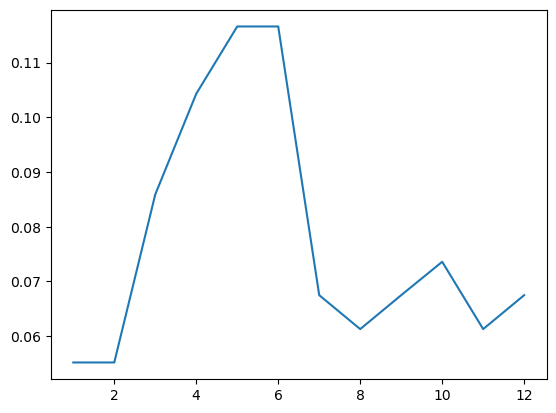

In [24]:
precision_top1_cos_vgg16 = []
for n in range(1, 13):
    rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg16, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_cos_vgg16.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_cos_vgg16)
plt.show()

In [25]:
rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg16, n=3)

In [26]:
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0920  Average Recall: 0.0532  Average F1-score: 0.0654
k=2:  Average Precision: 0.0951  Average Recall: 0.1084  Average F1-score: 0.0990
k=3:  Average Precision: 0.0982  Average Recall: 0.1677  Average F1-score: 0.1211
k=4:  Average Precision: 0.0874  Average Recall: 0.2004  Average F1-score: 0.1192
k=5:  Average Precision: 0.0822  Average Recall: 0.2301  Average F1-score: 0.1190
k=6:  Average Precision: 0.0798  Average Recall: 0.2669  Average F1-score: 0.1210
k=7:  Average Precision: 0.0798  Average Recall: 0.3078  Average F1-score: 0.1250
k=8:  Average Precision: 0.0782  Average Recall: 0.3507  Average F1-score: 0.1263
k=9:  Average Precision: 0.0791  Average Recall: 0.3957  Average F1-score: 0.1303
k=10:  Average Precision: 0.0785  Average Recall: 0.4325  Average F1-score: 0.1315


In [27]:
rec_eucl_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_vgg16, n=12)

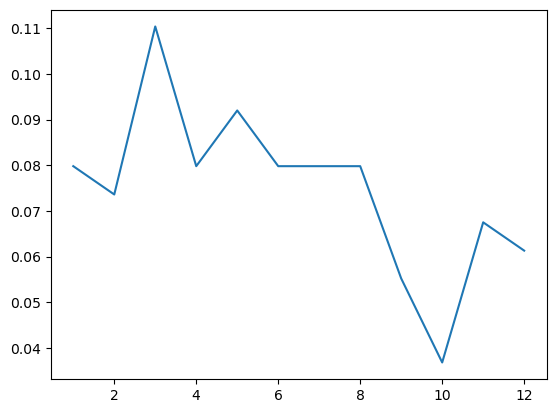

In [28]:
precision_top1_eucl_vgg16 = []
for n in range(1, 13):
    rec_eucl_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg16, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_vgg16, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_eucl_vgg16.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_eucl_vgg16)
plt.show()

In [29]:
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_vgg16, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0613  Average Recall: 0.0337  Average F1-score: 0.0429
k=2:  Average Precision: 0.0583  Average Recall: 0.0644  Average F1-score: 0.0595
k=3:  Average Precision: 0.0573  Average Recall: 0.0951  Average F1-score: 0.0699
k=4:  Average Precision: 0.0598  Average Recall: 0.1288  Average F1-score: 0.0805
k=5:  Average Precision: 0.0613  Average Recall: 0.1687  Average F1-score: 0.0887
k=6:  Average Precision: 0.0675  Average Recall: 0.2249  Average F1-score: 0.1023
k=7:  Average Precision: 0.0727  Average Recall: 0.2832  Average F1-score: 0.1143
k=8:  Average Precision: 0.0744  Average Recall: 0.3405  Average F1-score: 0.1205
k=9:  Average Precision: 0.0757  Average Recall: 0.3906  Average F1-score: 0.1252
k=10:  Average Precision: 0.0773  Average Recall: 0.4376  Average F1-score: 0.1299


In [30]:
rec_cos_vgg19 = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg19, n =1)

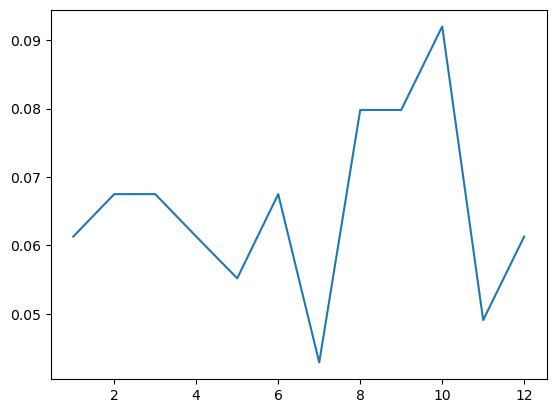

In [31]:
precision_top1_cos_vgg19 = []
for n in range(1, 13):
    rec_cos_vgg19 = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg19, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg19, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_cos_vgg19.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_cos_vgg19)
plt.show()

In [32]:
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg19, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0613  Average Recall: 0.0399  Average F1-score: 0.0470
k=2:  Average Precision: 0.0706  Average Recall: 0.0879  Average F1-score: 0.0761
k=3:  Average Precision: 0.0798  Average Recall: 0.1401  Average F1-score: 0.0990
k=4:  Average Precision: 0.0782  Average Recall: 0.1779  Average F1-score: 0.1062
k=5:  Average Precision: 0.0736  Average Recall: 0.2147  Average F1-score: 0.1074
k=6:  Average Precision: 0.0695  Average Recall: 0.2423  Average F1-score: 0.1061
k=7:  Average Precision: 0.0675  Average Recall: 0.2791  Average F1-score: 0.1069
k=8:  Average Precision: 0.0660  Average Recall: 0.3057  Average F1-score: 0.1069
k=9:  Average Precision: 0.0723  Average Recall: 0.3681  Average F1-score: 0.1193
k=10:  Average Precision: 0.0718  Average Recall: 0.4008  Average F1-score: 0.1204


In [33]:
rec_eucl_vgg19 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_vgg19, n=1)

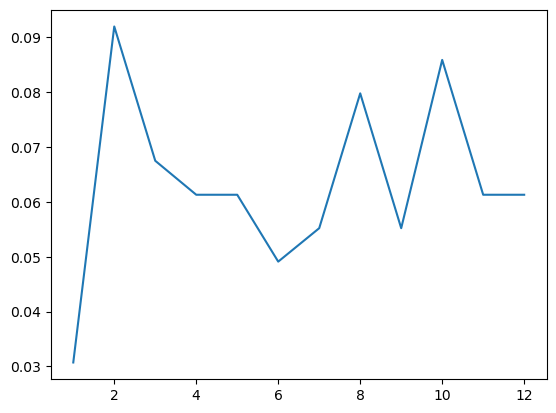

In [34]:
precision_top1_eucl_vgg19 = []
for n in range(1, 13):
    rec_eucl_vgg19 = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg19, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_vgg19, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_eucl_vgg19.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_eucl_vgg19)
plt.show()

In [35]:
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_vgg19, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0613  Average Recall: 0.0399  Average F1-score: 0.0470
k=2:  Average Precision: 0.0706  Average Recall: 0.0818  Average F1-score: 0.0740
k=3:  Average Precision: 0.0757  Average Recall: 0.1299  Average F1-score: 0.0937
k=4:  Average Precision: 0.0721  Average Recall: 0.1636  Average F1-score: 0.0984
k=5:  Average Precision: 0.0712  Average Recall: 0.2014  Average F1-score: 0.1034
k=6:  Average Precision: 0.0736  Average Recall: 0.2526  Average F1-score: 0.1122
k=7:  Average Precision: 0.0771  Average Recall: 0.3057  Average F1-score: 0.1214
k=8:  Average Precision: 0.0798  Average Recall: 0.3599  Average F1-score: 0.1289
k=9:  Average Precision: 0.0777  Average Recall: 0.3957  Average F1-score: 0.1283
k=10:  Average Precision: 0.0773  Average Recall: 0.4448  Average F1-score: 0.1302


In [36]:
rec_cos_resnet50 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet50_1, n=12)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet50, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0613  Average Recall: 0.0286  Average F1-score: 0.0389
k=2:  Average Precision: 0.0706  Average Recall: 0.0685  Average F1-score: 0.0693
k=3:  Average Precision: 0.0716  Average Recall: 0.1207  Average F1-score: 0.0881
k=4:  Average Precision: 0.0813  Average Recall: 0.1840  Average F1-score: 0.1108
k=5:  Average Precision: 0.0810  Average Recall: 0.2301  Average F1-score: 0.1180
k=6:  Average Precision: 0.0859  Average Recall: 0.2904  Average F1-score: 0.1308
k=7:  Average Precision: 0.0806  Average Recall: 0.3139  Average F1-score: 0.1268
k=8:  Average Precision: 0.0798  Average Recall: 0.3558  Average F1-score: 0.1288
k=9:  Average Precision: 0.0798  Average Recall: 0.4008  Average F1-score: 0.1316
k=10:  Average Precision: 0.0785  Average Recall: 0.4387  Average F1-score: 0.1318


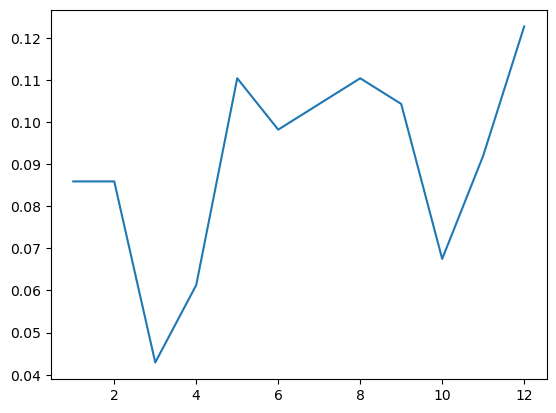

In [37]:
precision_top1_cos_resnet50 = []
for n in range(1, 13):
    rec_cos_resnet50 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet50_1, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet50, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_cos_resnet50.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_cos_resnet50)
plt.show()

In [38]:
rec_eucl_resnet50 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet50_1, n=5)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet50, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0675  Average Recall: 0.0317  Average F1-score: 0.0429
k=2:  Average Precision: 0.0613  Average Recall: 0.0583  Average F1-score: 0.0595
k=3:  Average Precision: 0.0695  Average Recall: 0.1063  Average F1-score: 0.0830
k=4:  Average Precision: 0.0644  Average Recall: 0.1339  Average F1-score: 0.0859
k=5:  Average Precision: 0.0712  Average Recall: 0.1963  Average F1-score: 0.1027
k=6:  Average Precision: 0.0736  Average Recall: 0.2464  Average F1-score: 0.1115
k=7:  Average Precision: 0.0719  Average Recall: 0.2751  Average F1-score: 0.1123
k=8:  Average Precision: 0.0752  Average Recall: 0.3292  Average F1-score: 0.1208
k=9:  Average Precision: 0.0784  Average Recall: 0.3763  Average F1-score: 0.1282
k=10:  Average Precision: 0.0773  Average Recall: 0.4121  Average F1-score: 0.1288


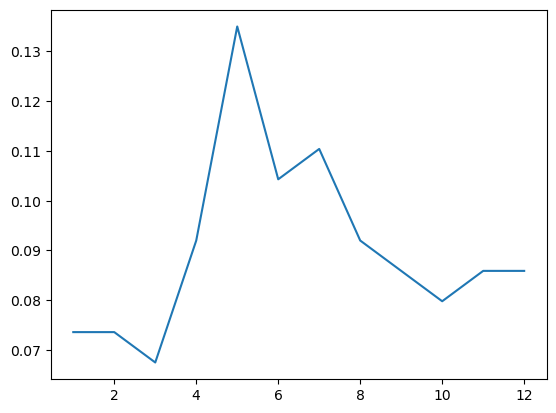

In [39]:
precision_top1_eucl_resnet50 = []
for n in range(1, 13):
    rec_eucl_resnet50 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet50_1, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet50, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_eucl_resnet50.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_eucl_resnet50)
plt.show()

In [41]:
rec_cos_resnet50v2 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet50v2_1, n = 3)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet50v2, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0675  Average Recall: 0.0358  Average F1-score: 0.0460
k=2:  Average Precision: 0.0890  Average Recall: 0.0961  Average F1-score: 0.0908
k=3:  Average Precision: 0.0961  Average Recall: 0.1636  Average F1-score: 0.1188
k=4:  Average Precision: 0.0874  Average Recall: 0.1984  Average F1-score: 0.1191
k=5:  Average Precision: 0.0871  Average Recall: 0.2393  Average F1-score: 0.1258
k=6:  Average Precision: 0.0849  Average Recall: 0.2812  Average F1-score: 0.1285
k=7:  Average Precision: 0.0833  Average Recall: 0.3231  Average F1-score: 0.1306
k=8:  Average Precision: 0.0844  Average Recall: 0.3763  Average F1-score: 0.1360
k=9:  Average Precision: 0.0845  Average Recall: 0.4192  Average F1-score: 0.1390
k=10:  Average Precision: 0.0822  Average Recall: 0.4550  Average F1-score: 0.1377


In [42]:
precision_top1_cos_resnet50v2 = []
for n in range(1, 13):
    rec_cos_resnet50v2 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet50v2_1, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet50v2, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_cos_resnet50v2.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_cos_resnet50v2)
plt.show()

KeyboardInterrupt: 

In [ ]:
rec_eucl_resnet50v2 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet50v2_1), n=3
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet50v2, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0184  Average Recall: 0.0082  Average F1-score: 0.0112
k=2:  Average Precision: 0.0092  Average Recall: 0.0082  Average F1-score: 0.0086
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0046  Average Recall: 0.0082  Average F1-score: 0.0058
k=5:  Average Precision: 0.0037  Average Recall: 0.0082  Average F1-score: 0.0050
k=6:  Average Precision: 0.0031  Average Recall: 0.0082  Average F1-score: 0.0044
k=7:  Average Precision: 0.0026  Average Recall: 0.0082  Average F1-score: 0.0040
k=8:  Average Precision: 0.0023  Average Recall: 0.0082  Average F1-score: 0.0036
k=9:  Average Precision: 0.0027  Average Recall: 0.0112  Average F1-score: 0.0044
k=10:  Average Precision: 0.0025  Average Recall: 0.0112  Average F1-score: 0.0040


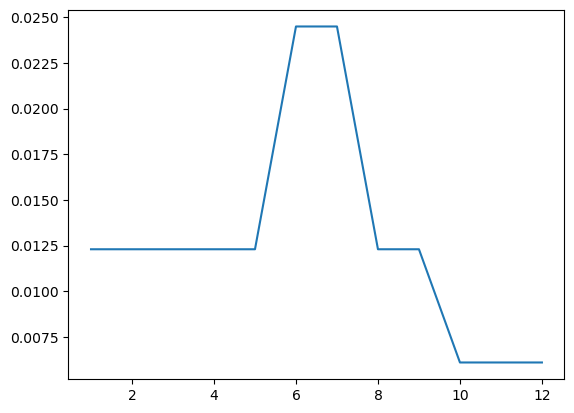

In [ ]:
precision_top1_eucl_resnet50v2 = []
for n in range(1, 13):
    rec_eucl_resnet50v2 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet50v2_1, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet50v2, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_eucl_resnet50v2.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_eucl_resnet50v2)
plt.show()

In [ ]:
rec_cos_resnet101 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet101_1, n=3)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet101, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0123  Average Recall: 0.0051  Average F1-score: 0.0072
k=2:  Average Precision: 0.0061  Average Recall: 0.0051  Average F1-score: 0.0055
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0061  Average Recall: 0.0112  Average F1-score: 0.0079
k=5:  Average Precision: 0.0061  Average Recall: 0.0143  Average F1-score: 0.0085
k=6:  Average Precision: 0.0051  Average Recall: 0.0143  Average F1-score: 0.0075
k=7:  Average Precision: 0.0044  Average Recall: 0.0143  Average F1-score: 0.0067
k=8:  Average Precision: 0.0038  Average Recall: 0.0143  Average F1-score: 0.0060
k=9:  Average Precision: 0.0041  Average Recall: 0.0204  Average F1-score: 0.0067
k=10:  Average Precision: 0.0037  Average Recall: 0.0204  Average F1-score: 0.0061


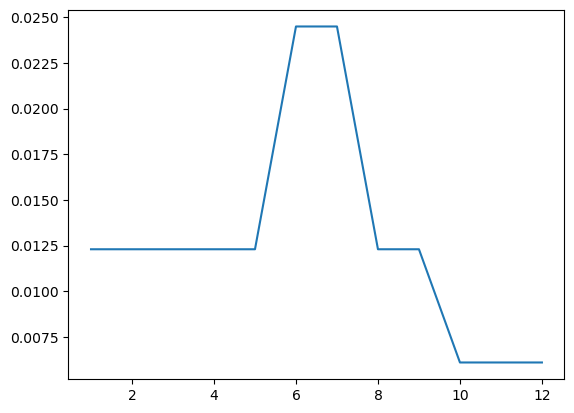

In [ ]:
precision_top1_cos_resnet101 = []
for n in range(1, 13):
    rec_cos_resnet101 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet101_1, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet101, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_cos_resnet101.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_cos_resnet101)
plt.show()

In [ ]:
rec_eucl_resnet101 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet101_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet101, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0184  Average Recall: 0.0082  Average F1-score: 0.0112
k=2:  Average Precision: 0.0092  Average Recall: 0.0082  Average F1-score: 0.0086
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0046  Average Recall: 0.0082  Average F1-score: 0.0058
k=5:  Average Precision: 0.0037  Average Recall: 0.0082  Average F1-score: 0.0050
k=6:  Average Precision: 0.0031  Average Recall: 0.0082  Average F1-score: 0.0044
k=7:  Average Precision: 0.0026  Average Recall: 0.0082  Average F1-score: 0.0040
k=8:  Average Precision: 0.0023  Average Recall: 0.0082  Average F1-score: 0.0036
k=9:  Average Precision: 0.0027  Average Recall: 0.0112  Average F1-score: 0.0044
k=10:  Average Precision: 0.0025  Average Recall: 0.0112  Average F1-score: 0.0040


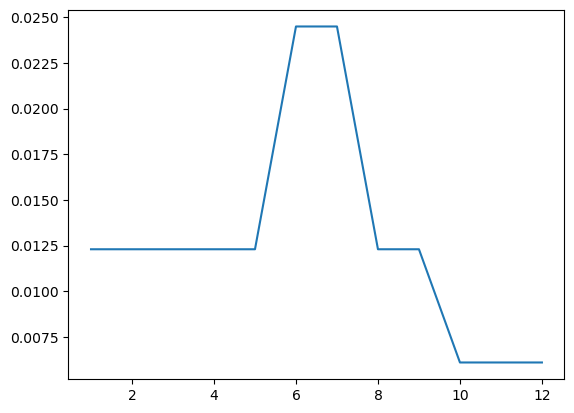

In [ ]:
precision_top1_eucl_resnet101 = []
for n in range(1, 13):
    rec_eucl_resnet101 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet101_1, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet101, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_eucl_resnet101.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_eucl_resnet101)
plt.show()

In [ ]:
rec_cos_resnet101v2 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet101v2_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet101v2, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0123  Average Recall: 0.0051  Average F1-score: 0.0072
k=2:  Average Precision: 0.0061  Average Recall: 0.0051  Average F1-score: 0.0055
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0061  Average Recall: 0.0112  Average F1-score: 0.0079
k=5:  Average Precision: 0.0061  Average Recall: 0.0143  Average F1-score: 0.0085
k=6:  Average Precision: 0.0051  Average Recall: 0.0143  Average F1-score: 0.0075
k=7:  Average Precision: 0.0044  Average Recall: 0.0143  Average F1-score: 0.0067
k=8:  Average Precision: 0.0038  Average Recall: 0.0143  Average F1-score: 0.0060
k=9:  Average Precision: 0.0041  Average Recall: 0.0204  Average F1-score: 0.0067
k=10:  Average Precision: 0.0037  Average Recall: 0.0204  Average F1-score: 0.0061


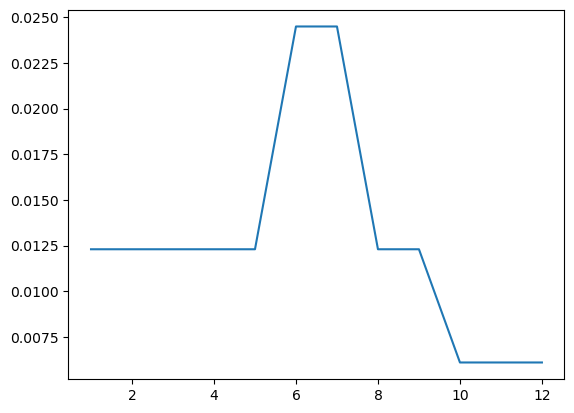

In [ ]:
precision_top1_cos_resnet101v2 = []
for n in range(1, 13):
    rec_cos_resnet101v2 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet101v2_1, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet101v2, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_cos_resnet101v2.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_cos_resnet101v2)
plt.show()

In [ ]:
rec_eucl_resnet101v2 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet101v2_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet101v2, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0184  Average Recall: 0.0082  Average F1-score: 0.0112
k=2:  Average Precision: 0.0092  Average Recall: 0.0082  Average F1-score: 0.0086
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0046  Average Recall: 0.0082  Average F1-score: 0.0058
k=5:  Average Precision: 0.0037  Average Recall: 0.0082  Average F1-score: 0.0050
k=6:  Average Precision: 0.0031  Average Recall: 0.0082  Average F1-score: 0.0044
k=7:  Average Precision: 0.0026  Average Recall: 0.0082  Average F1-score: 0.0040
k=8:  Average Precision: 0.0023  Average Recall: 0.0082  Average F1-score: 0.0036
k=9:  Average Precision: 0.0027  Average Recall: 0.0112  Average F1-score: 0.0044
k=10:  Average Precision: 0.0025  Average Recall: 0.0112  Average F1-score: 0.0040


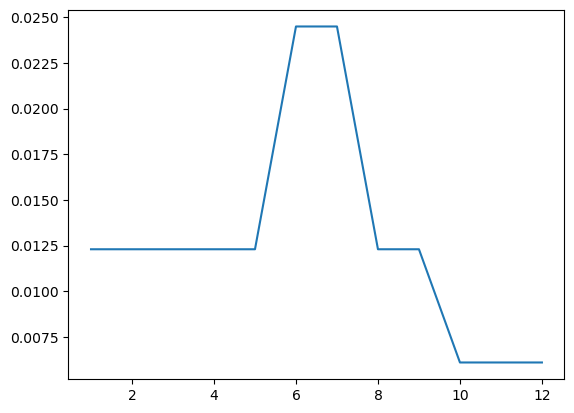

In [ ]:
precision_top1_eucl_resnet101v2 = []
for n in range(1, 13):
    rec_eucl_resnet101v2 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet101v2_1, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet101v2, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_eucl_resnet101v2.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_eucl_resnet101v2)
plt.show()

In [ ]:
rec_cos_resnet152 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet152_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet152, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0123  Average Recall: 0.0051  Average F1-score: 0.0072
k=2:  Average Precision: 0.0061  Average Recall: 0.0051  Average F1-score: 0.0055
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0061  Average Recall: 0.0112  Average F1-score: 0.0079
k=5:  Average Precision: 0.0061  Average Recall: 0.0143  Average F1-score: 0.0085
k=6:  Average Precision: 0.0051  Average Recall: 0.0143  Average F1-score: 0.0075
k=7:  Average Precision: 0.0044  Average Recall: 0.0143  Average F1-score: 0.0067
k=8:  Average Precision: 0.0038  Average Recall: 0.0143  Average F1-score: 0.0060
k=9:  Average Precision: 0.0041  Average Recall: 0.0204  Average F1-score: 0.0067
k=10:  Average Precision: 0.0037  Average Recall: 0.0204  Average F1-score: 0.0061


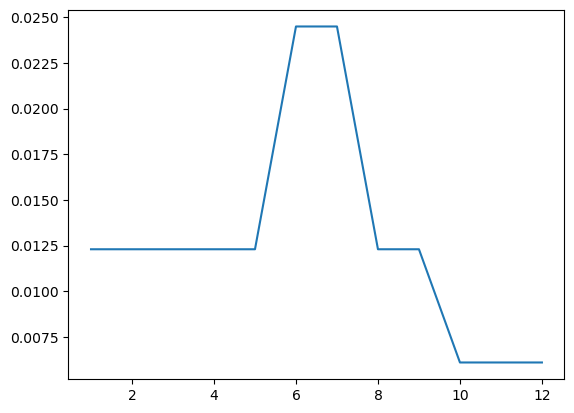

In [ ]:
precision_top1_cos_resnet152 = []
for n in range(1, 13):
    rec_cos_resnet152 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet152_1, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet152, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_cos_resnet152.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_cos_resnet152)
plt.show()

In [ ]:
rec_eucl_resnet152 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet152_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet152, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0184  Average Recall: 0.0082  Average F1-score: 0.0112
k=2:  Average Precision: 0.0092  Average Recall: 0.0082  Average F1-score: 0.0086
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0046  Average Recall: 0.0082  Average F1-score: 0.0058
k=5:  Average Precision: 0.0037  Average Recall: 0.0082  Average F1-score: 0.0050
k=6:  Average Precision: 0.0031  Average Recall: 0.0082  Average F1-score: 0.0044
k=7:  Average Precision: 0.0026  Average Recall: 0.0082  Average F1-score: 0.0040
k=8:  Average Precision: 0.0023  Average Recall: 0.0082  Average F1-score: 0.0036
k=9:  Average Precision: 0.0027  Average Recall: 0.0112  Average F1-score: 0.0044
k=10:  Average Precision: 0.0025  Average Recall: 0.0112  Average F1-score: 0.0040


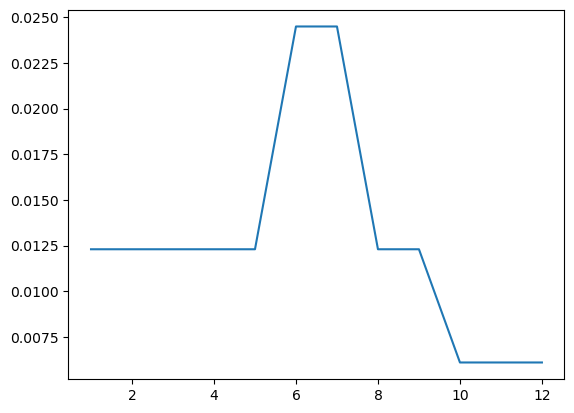

In [ ]:
precision_top1_eucl_resnet152 = []
for n in range(1, 13):
    rec_eucl_resnet152 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet152_1, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet152, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_eucl_resnet152.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_eucl_resnet152)
plt.show()

In [ ]:
rec_cos_resnet152v2 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet152v2_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet152v2, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0123  Average Recall: 0.0051  Average F1-score: 0.0072
k=2:  Average Precision: 0.0061  Average Recall: 0.0051  Average F1-score: 0.0055
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0061  Average Recall: 0.0112  Average F1-score: 0.0079
k=5:  Average Precision: 0.0061  Average Recall: 0.0143  Average F1-score: 0.0085
k=6:  Average Precision: 0.0051  Average Recall: 0.0143  Average F1-score: 0.0075
k=7:  Average Precision: 0.0044  Average Recall: 0.0143  Average F1-score: 0.0067
k=8:  Average Precision: 0.0038  Average Recall: 0.0143  Average F1-score: 0.0060
k=9:  Average Precision: 0.0041  Average Recall: 0.0204  Average F1-score: 0.0067
k=10:  Average Precision: 0.0037  Average Recall: 0.0204  Average F1-score: 0.0061


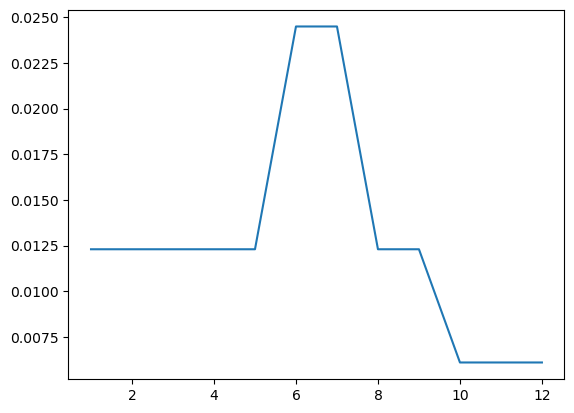

In [ ]:
precision_top1_cos_resnet152v2 = []
for n in range(1, 13):
    rec_cos_resnet152v2 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet152v2_1, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet152v2, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_cos_resnet152v2.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_cos_resnet152v2)
plt.show()

In [ ]:
rec_eucl_resnet152v2 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet152v2_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet152v2, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0184  Average Recall: 0.0082  Average F1-score: 0.0112
k=2:  Average Precision: 0.0092  Average Recall: 0.0082  Average F1-score: 0.0086
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0046  Average Recall: 0.0082  Average F1-score: 0.0058
k=5:  Average Precision: 0.0037  Average Recall: 0.0082  Average F1-score: 0.0050
k=6:  Average Precision: 0.0031  Average Recall: 0.0082  Average F1-score: 0.0044
k=7:  Average Precision: 0.0026  Average Recall: 0.0082  Average F1-score: 0.0040
k=8:  Average Precision: 0.0023  Average Recall: 0.0082  Average F1-score: 0.0036
k=9:  Average Precision: 0.0027  Average Recall: 0.0112  Average F1-score: 0.0044
k=10:  Average Precision: 0.0025  Average Recall: 0.0112  Average F1-score: 0.0040


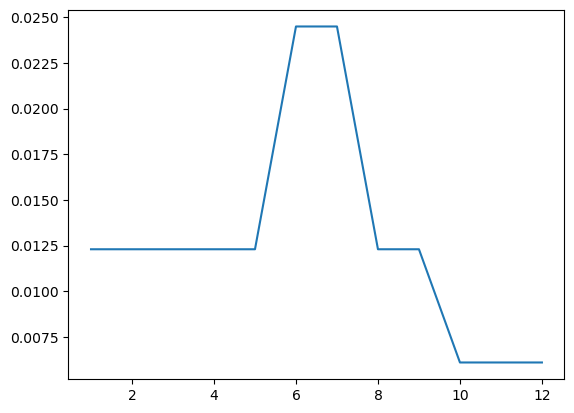

In [ ]:
precision_top1_eucl_resnet152v2 = []
for n in range(1, 13):
    rec_eucl_resnet152v2 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet152v2_1, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet152v2, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_eucl_resnet152v2.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_eucl_resnet152v2)
plt.show()

In [ ]:
rec_cos_inceptionv3 = recommend_items_by_user_cos(trainset, testset, df_embeddings_inceptionv3_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_inceptionv3, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0123  Average Recall: 0.0051  Average F1-score: 0.0072
k=2:  Average Precision: 0.0061  Average Recall: 0.0051  Average F1-score: 0.0055
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0061  Average Recall: 0.0112  Average F1-score: 0.0079
k=5:  Average Precision: 0.0061  Average Recall: 0.0143  Average F1-score: 0.0085
k=6:  Average Precision: 0.0051  Average Recall: 0.0143  Average F1-score: 0.0075
k=7:  Average Precision: 0.0044  Average Recall: 0.0143  Average F1-score: 0.0067
k=8:  Average Precision: 0.0038  Average Recall: 0.0143  Average F1-score: 0.0060
k=9:  Average Precision: 0.0041  Average Recall: 0.0204  Average F1-score: 0.0067
k=10:  Average Precision: 0.0037  Average Recall: 0.0204  Average F1-score: 0.0061


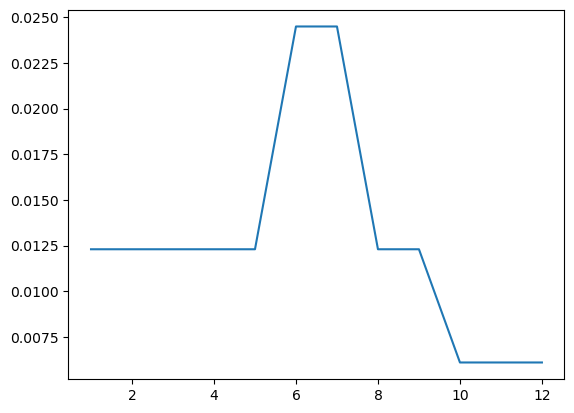

In [ ]:
precision_top1_cos_inceptionv3 = []
for n in range(1, 13):
    rec_cos_inceptionv3 = recommend_items_by_user_cos(trainset, testset, df_embeddings_inceptionv3_1, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_cos_inceptionv3, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_cos_inceptionv3.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_cos_inceptionv3)
plt.show()

In [ ]:
rec_eucl_inceptionv3 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_inceptionv3_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_inceptionv3, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0184  Average Recall: 0.0082  Average F1-score: 0.0112
k=2:  Average Precision: 0.0092  Average Recall: 0.0082  Average F1-score: 0.0086
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0046  Average Recall: 0.0082  Average F1-score: 0.0058
k=5:  Average Precision: 0.0037  Average Recall: 0.0082  Average F1-score: 0.0050
k=6:  Average Precision: 0.0031  Average Recall: 0.0082  Average F1-score: 0.0044
k=7:  Average Precision: 0.0026  Average Recall: 0.0082  Average F1-score: 0.0040
k=8:  Average Precision: 0.0023  Average Recall: 0.0082  Average F1-score: 0.0036
k=9:  Average Precision: 0.0027  Average Recall: 0.0112  Average F1-score: 0.0044
k=10:  Average Precision: 0.0025  Average Recall: 0.0112  Average F1-score: 0.0040


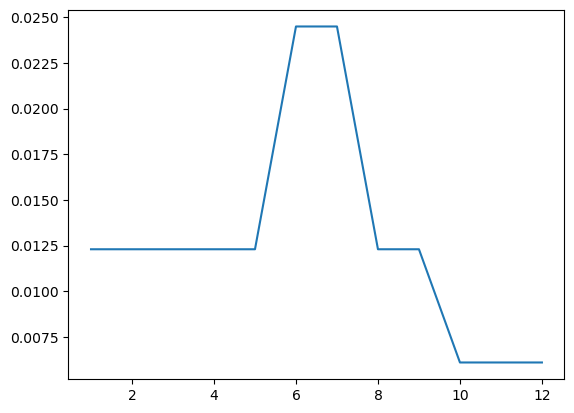

In [ ]:
precision_top1_eucl_inceptionv3 = []
for n in range(1, 13):
    rec_eucl_inceptionv3 = recommend_items_by_user_cos(trainset, testset, df_embeddings_inceptionv3_1, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_inceptionv3, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_eucl_inceptionv3.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_eucl_inceptionv3)
plt.show()

In [ ]:
rec_cos_xception = recommend_items_by_user_cos(trainset, testset, df_embeddings_xception_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_xception, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0123  Average Recall: 0.0051  Average F1-score: 0.0072
k=2:  Average Precision: 0.0061  Average Recall: 0.0051  Average F1-score: 0.0055
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0061  Average Recall: 0.0112  Average F1-score: 0.0079
k=5:  Average Precision: 0.0061  Average Recall: 0.0143  Average F1-score: 0.0085
k=6:  Average Precision: 0.0051  Average Recall: 0.0143  Average F1-score: 0.0075
k=7:  Average Precision: 0.0044  Average Recall: 0.0143  Average F1-score: 0.0067
k=8:  Average Precision: 0.0038  Average Recall: 0.0143  Average F1-score: 0.0060
k=9:  Average Precision: 0.0041  Average Recall: 0.0204  Average F1-score: 0.0067
k=10:  Average Precision: 0.0037  Average Recall: 0.0204  Average F1-score: 0.0061


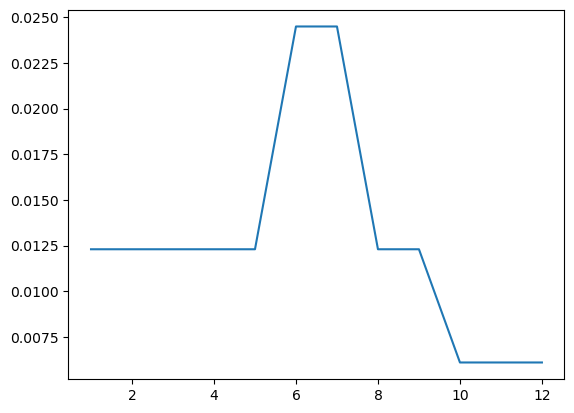

In [ ]:
precision_top1_cos_xception = []
for n in range(1, 13):
    rec_cos_xception = recommend_items_by_user_cos(trainset, testset, df_embeddings_xception_1, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_cos_xception, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_cos_xception.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_cos_xception)
plt.show()

In [ ]:
rec_eucl_xception = recommend_items_by_user_eucl(trainset, testset, df_embeddings_xception_1)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_xception, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0184  Average Recall: 0.0082  Average F1-score: 0.0112
k=2:  Average Precision: 0.0092  Average Recall: 0.0082  Average F1-score: 0.0086
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0046  Average Recall: 0.0082  Average F1-score: 0.0058
k=5:  Average Precision: 0.0037  Average Recall: 0.0082  Average F1-score: 0.0050
k=6:  Average Precision: 0.0031  Average Recall: 0.0082  Average F1-score: 0.0044
k=7:  Average Precision: 0.0026  Average Recall: 0.0082  Average F1-score: 0.0040
k=8:  Average Precision: 0.0023  Average Recall: 0.0082  Average F1-score: 0.0036
k=9:  Average Precision: 0.0027  Average Recall: 0.0112  Average F1-score: 0.0044
k=10:  Average Precision: 0.0025  Average Recall: 0.0112  Average F1-score: 0.0040


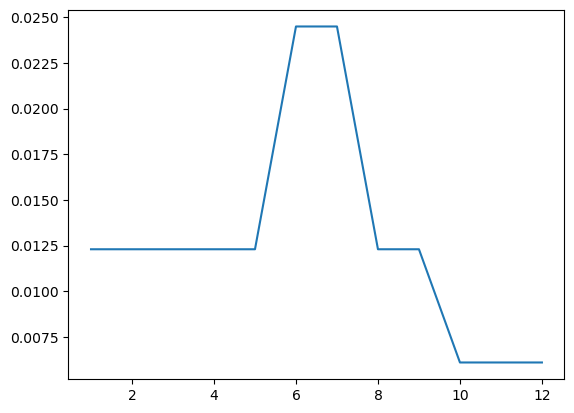

In [ ]:
precision_top1_eucl_xception = []
for n in range(1, 13):
    rec_eucl_xception = recommend_items_by_user_cos(trainset, testset, df_embeddings_xception_1, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_xception, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_eucl_xception.append(avg_precisions.get(1))

#print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_eucl_xception)
plt.show()

In [ ]:
# def recommend_items_by_user_eucl(trainset, testset,df_embeddings, n=5):

#     train_df = pd.DataFrame(trainset, columns=['uid', 'iid', 'rating'])
#     test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])

#     items_all_ids = set(train_df['iid'].to_list() + test_df['iid'].to_list())

#     similarity_df = compute_euclidean_similarity_matrix_by_user(df_embeddings)
#     # print(similarity_df)

#     recommendations = {}

#     for user in test_df['uid'].unique():

#         user_train = train_df[train_df['uid'] == user]
#         user_test = test_df[test_df['uid'] == user]

#         train_item_ids = user_train['iid'].to_list()
#         # print(train_item_ids)
#         test_item_ids = user_test['iid'].to_list()

#         items_to_recommend = []
#         for item_test in test_item_ids:
#             item_train_sim = similar_items(item_test, train_item_ids, similarity_df, n)
#             # print(item_train_sim)
#             item_train_sim_df = user_train[user_train['iid'].isin(item_train_sim)]
#             ratings = item_train_sim_df['rating'].tolist()
#             mean_value = np.mean(ratings) if ratings else 0 
#             items_to_recommend.append((item_test, mean_value))

#         items_to_recommend_ids = [item for item, _ in items_to_recommend] 
        
#         if len(items_to_recommend_ids) < 10:
#             available_items = list(items_all_ids - set(train_item_ids) - set(items_to_recommend_ids))
#             num_to_add = 10 - len(items_to_recommend_ids)
#             if len(available_items) > num_to_add:
#                 random_items = random.sample(available_items, num_to_add)
#             else:
#                 random_items = available_items

#             for item_random in random_items:
#                 item_random_sim = similar_items(item_random, train_item_ids, similarity_df, n)
#                 item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim)]
#                 ratings_random = item_random_sim_df['rating'].tolist()
#                 mean_value_random = np.mean(ratings_random) if ratings_random else 0
#                 items_to_recommend.append((item_random, mean_value_random))
                
#             # print(items_to_recommend)
#             # print(len(items_to_recommend))

#             items_to_recommend.sort(key=lambda x: x[1], reverse=True)
#             # print(items_to_recommend)
#             items_to_recommend_ids = [item for item, _ in items_to_recommend]

#         recommendations[user] = items_to_recommend_ids[:10]

#     return recommendations

In [ ]:
# rec_eucl_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_vgg16)

[2, 2050, 2053, 6, 14, 2067, 25, 2073, 2074, 32]
[2, 2050, 2053, 6, 14, 2067, 2073, 2074, 32, 38]
[2, 2050, 2053, 6, 14, 2067, 25, 2073, 2074, 32]
[2, 2050, 6, 14, 2067, 25, 2074, 32, 38, 39]
[2, 2050, 2053, 6, 14, 25, 2073, 2074, 32, 38]
[2, 2050, 2053, 6, 14, 2067, 25, 2073, 2074, 32]
[2, 2050, 2053, 6, 14, 2067, 25, 2073, 2074, 32]
[2, 2050, 2053, 6, 14, 2067, 25, 2073, 2074, 32]
[2, 2050, 2053, 6, 14, 2067, 25, 2073, 2074, 32]
[2, 2050, 2053, 6, 2067, 25, 2073, 2074, 32, 38]
[2, 2050, 2053, 6, 14, 2067, 25, 2073, 2074, 32]
[2, 2050, 2053, 6, 14, 2067, 25, 2073, 2074, 32]
[2, 2050, 2053, 6, 14, 2067, 25, 2073, 2074, 32]
[2, 2050, 2053, 6, 14, 2067, 25, 2073, 2074, 32]
[2, 2050, 2053, 6, 14, 2067, 25, 2073, 2074, 32]
[2, 2050, 2053, 6, 14, 2067, 25, 2073, 2074, 32]
[2, 2050, 2053, 6, 14, 2067, 25, 2073, 2074, 32]
[2, 2050, 2053, 6, 14, 2067, 25, 2073, 2074, 32]
[2, 2050, 2053, 6, 14, 2067, 25, 2073, 2074, 32]
[2, 2050, 2053, 14, 2067, 25, 2073, 2074, 32, 38]
[2, 2050, 2053, 6, 14, 20

In [ ]:
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_vgg16, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    # print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0184  Average Recall: 0.0082  Average F1-score: 0.0112
k=2:  Average Precision: 0.0092  Average Recall: 0.0082  Average F1-score: 0.0086
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0046  Average Recall: 0.0082  Average F1-score: 0.0058
k=5:  Average Precision: 0.0037  Average Recall: 0.0082  Average F1-score: 0.0050
k=6:  Average Precision: 0.0031  Average Recall: 0.0082  Average F1-score: 0.0044
k=7:  Average Precision: 0.0026  Average Recall: 0.0082  Average F1-score: 0.0040
k=8:  Average Precision: 0.0023  Average Recall: 0.0082  Average F1-score: 0.0036
k=9:  Average Precision: 0.0027  Average Recall: 0.0112  Average F1-score: 0.0044
k=10:  Average Precision: 0.0025  Average Recall: 0.0112  Average F1-score: 0.0040


In [ ]:
# rec_cos_resnet152 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet152_1)

[98, 471, 2521, 2632, 2811, 2848, 857, 1087, 1323, 2050]
[2137, 731, 2792, 748, 2995, 1007, 1146, 1302, 1569, 1594]
[2237, 2368, 567, 2706, 1146, 1538, 2067, 2073, 2087, 80]
[2, 2050, 6, 14, 2067, 25, 2074, 32, 38, 39]
[2, 2050, 2053, 6, 14, 25, 2073, 2074, 32, 38]
[2, 2050, 2053, 6, 14, 2067, 25, 2073, 2074, 32]
[2396, 2448, 2594, 601, 681, 990, 1442, 1513, 1642, 2067]
[2810, 1013, 2087, 2097, 62, 2111, 98, 128, 193, 2258]
[14, 2067, 46, 2095, 55, 62, 2184, 2192, 2202, 155]
[2, 542, 689, 2876, 2882, 2892, 2895, 2922, 1247, 1429]
[2184, 2192, 2521, 476, 2868, 2940, 2957, 1358, 2050, 2053]
[2067, 2073, 2074, 2089, 46, 2095, 2097, 2098, 62, 2111]
[2193, 2302, 2367, 2370, 2390, 2396, 2435, 2444, 2502, 498]
[2, 2053, 2067, 32, 39, 2089, 2095, 55, 2111, 2134]
[14, 2097, 2098, 60, 2127, 2144, 98, 129, 2184, 2191]
[2067, 2143, 2396, 2408, 498, 567, 599, 644, 1538, 2053]
[2087, 2099, 2114, 2121, 2144, 118, 2192, 2195, 2258, 2259]
[2050, 2053, 6, 14, 2067, 25, 2073, 2074, 39, 2087]
[2, 2050, 20

In [ ]:
# ks=range(1,11)
# precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet152 , testset, ks=ks)
# avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
# for k in ks:
#     print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0123  Average Recall: 0.0051  Average F1-score: 0.0072
k=2:  Average Precision: 0.0092  Average Recall: 0.0082  Average F1-score: 0.0086
k=3:  Average Precision: 0.0061  Average Recall: 0.0082  Average F1-score: 0.0070
k=4:  Average Precision: 0.0061  Average Recall: 0.0112  Average F1-score: 0.0079
k=5:  Average Precision: 0.0061  Average Recall: 0.0143  Average F1-score: 0.0085
k=6:  Average Precision: 0.0061  Average Recall: 0.0174  Average F1-score: 0.0090
k=7:  Average Precision: 0.0061  Average Recall: 0.0204  Average F1-score: 0.0094
k=8:  Average Precision: 0.0061  Average Recall: 0.0266  Average F1-score: 0.0098
k=9:  Average Precision: 0.0061  Average Recall: 0.0297  Average F1-score: 0.0101
k=10:  Average Precision: 0.0055  Average Recall: 0.0297  Average F1-score: 0.0092
